In [30]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

In [10]:
logfile = "20210929170421_as"
logpath = f"experiments/{logfile}/log.pkl"

In [11]:
with open(logpath, "rb") as f:
    data = pickle.load(f)

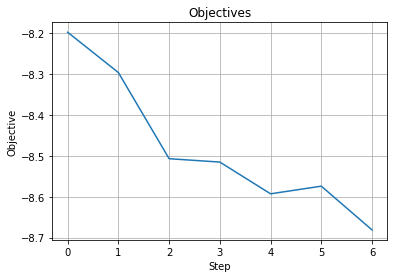

In [41]:
objectives = [sample["objective"] for sample in data["history"]]

plt.title("Objectives")
plt.plot(objectives)
plt.xlabel("Step")
plt.ylabel("Objective")
plt.grid()
plt.show()

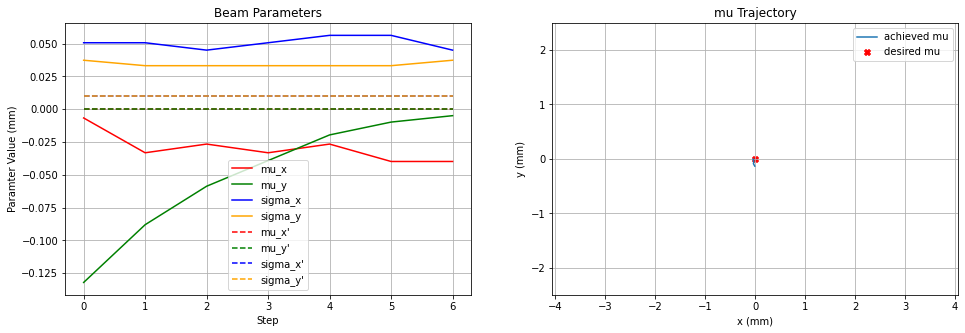

In [42]:
achieveds = np.array([sample["observation"]["achieved_goal"] for sample in data["history"]])
desireds = np.array([sample["observation"]["desired_goal"] for sample in data["history"]])

screen_resolution = (2448, 2040)
pixel_size = (3.3198e-6, 2.4469e-6)

plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title("Beam Parameters")
plt.plot(achieveds[:,0] * 1e3, label="mu_x", c="red")
plt.plot(achieveds[:,1] * 1e3, label="mu_y", c="green")
plt.plot(achieveds[:,2] * 1e3, label="sigma_x", c="blue")
plt.plot(achieveds[:,3] * 1e3, label="sigma_y", c="orange")
plt.plot(desireds[:,0] * 1e3, label="mu_x'", ls="--", c="red")
plt.plot(desireds[:,1] * 1e3, label="mu_y'", ls="--", c="green")
plt.plot(desireds[:,2] * 1e3, label="sigma_x'", ls="--", c="blue")
plt.plot(desireds[:,3] * 1e3, label="sigma_y'", ls="--", c="orange")
plt.xlabel("Step")
plt.ylabel("Paramter Value (mm)")
plt.grid()
plt.legend()
plt.subplot(122)
plt.title("mu Trajectory")
plt.plot(achieveds[:,0] * 1e3, achieveds[:,1] * 1e3, label="achieved mu")
plt.scatter(desireds[0,0] * 1e3, desireds[0,1] * 1e3, marker="X", c="red", label="desired mu")
plt.xlim(-pixel_size[0] * screen_resolution[0] / 2 * 1e3, pixel_size[0] * screen_resolution[0] / 2 * 1e3)
plt.ylim(-pixel_size[1] * screen_resolution[1] / 2 * 1e3, pixel_size[1] * screen_resolution[1] / 2 * 1e3)
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.grid()
plt.legend()
plt.show()